In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

# Measurement

<IPython.core.display.Javascript object>


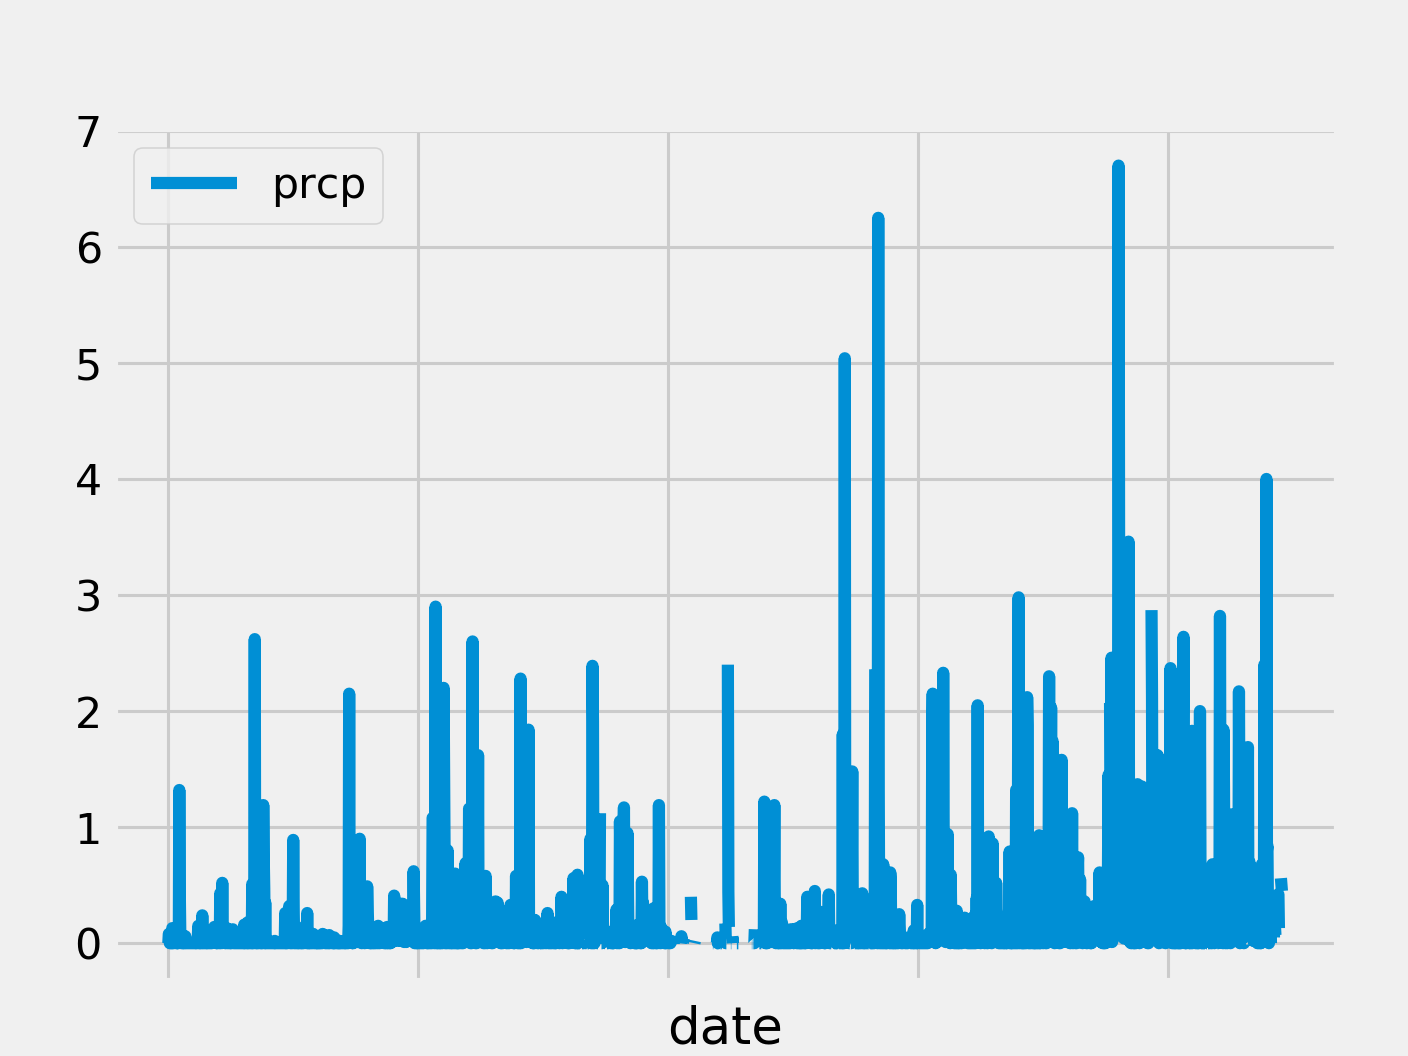

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_ago = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df  = pd.DataFrame(one_year_ago)

# Sort the dataframe by date
df = df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
# Rotate the xticks for the dates


![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station

In [12]:
# How many stations are available in this dataset?
for c in session.query(Station):
    print(c)
    
# there are 9 stations

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
# result = engine.execute('SELECT * FROM Station, Measurement inner join ')
result = session.query(Station.station, Measurement.tobs, Station.id).filter(Measurement.station == Station.station).all()
station_df = pd.DataFrame(result).groupby(['id','station']).count().sort_values('tobs', ascending=False)
station_df

,,tobs
id,station,
7,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
6,USC00519523,2669
9,USC00516128,2612
3,USC00514830,2202
8,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_station = pd.DataFrame(result).groupby(['id', 'station']).min().sort_values('tobs', ascending=False)
max_station = pd.DataFrame(result).groupby(['id', 'station']).max().sort_values('tobs', ascending=False)
mean_station = pd.DataFrame(result).groupby(['id', 'station']).mean().sort_values('tobs', ascending=False)
print(mean_station, max_station, min_station)


                     tobs
id station               
3  USC00514830  74.873297
4  USC00517948  74.684402
1  USC00519397  74.553231
6  USC00519523  74.543649
5  USC00518838  72.724070
2  USC00513117  72.689184
7  USC00519281  71.663781
8  USC00511918  71.615968
9  USC00516128  70.915008                 tobs
id station          
1  USC00519397  87.0
4  USC00517948  87.0
8  USC00511918  87.0
2  USC00513117  85.0
3  USC00514830  85.0
6  USC00519523  85.0
7  USC00519281  85.0
9  USC00516128  84.0
5  USC00518838  83.0                 tobs
id station          
2  USC00513117  59.0
3  USC00514830  58.0
4  USC00517948  58.0
5  USC00518838  58.0
9  USC00516128  58.0
1  USC00519397  56.0
6  USC00519523  56.0
7  USC00519281  54.0
8  USC00511918  53.0


<IPython.core.display.Javascript object>


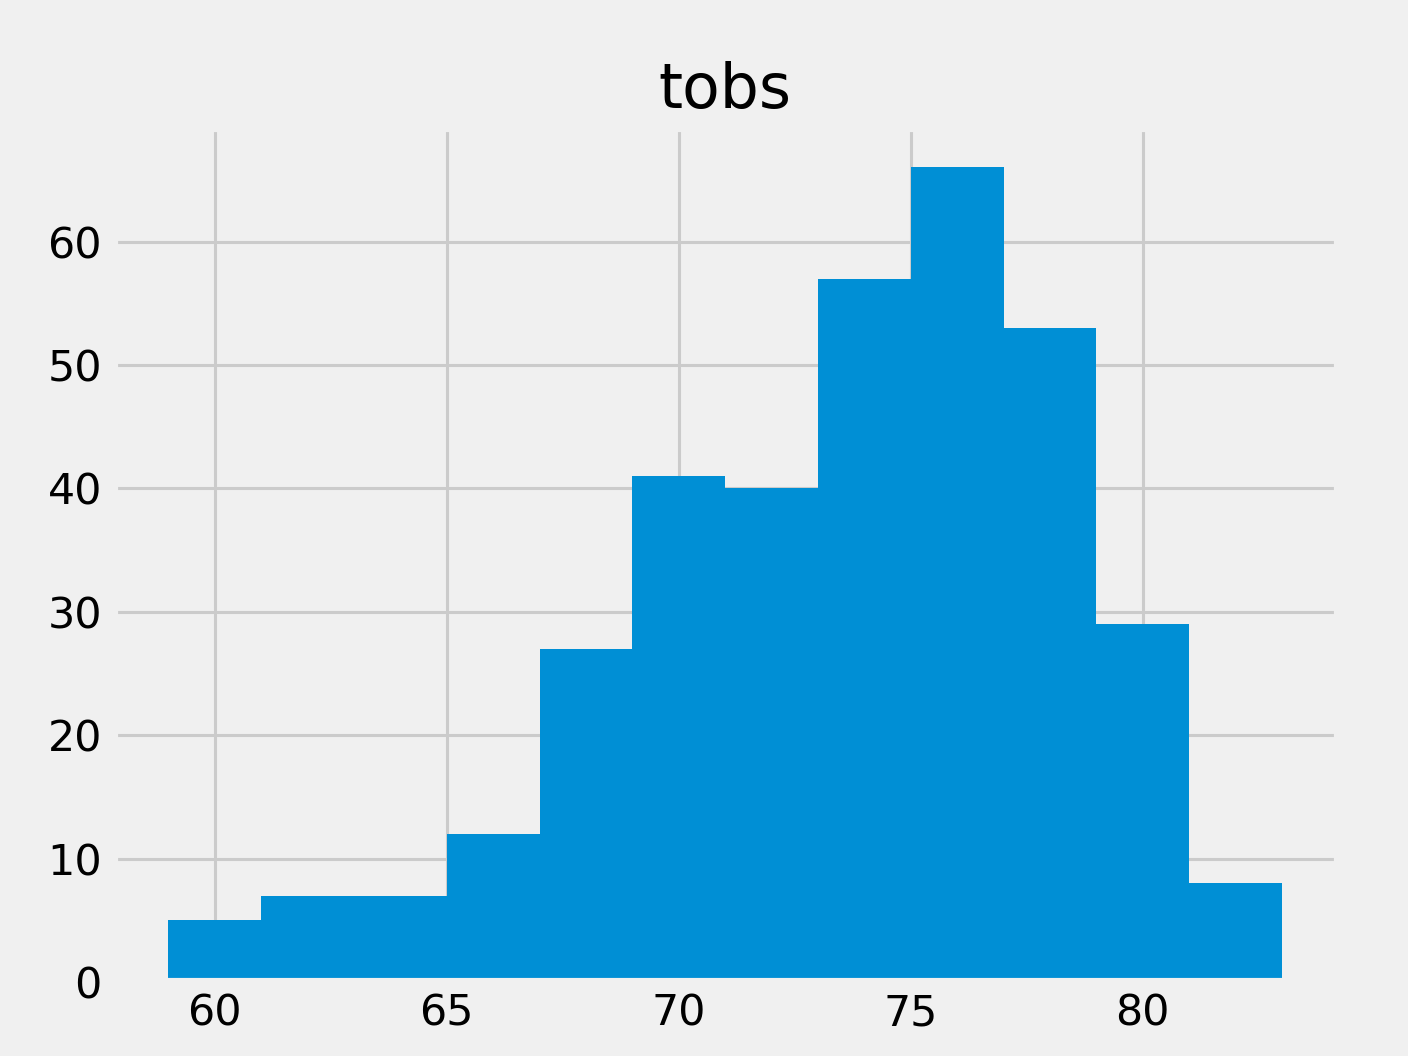

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12030b9e8>]],
      dtype=object)

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == "USC00519281").all()

oyat_df = pd.DataFrame(one_year_ago_temp).set_index('date')                                                                 
oyat_df                                                                                 
oyat_df.hist(bins=12)                                                           

![station-histogram](Images/station-histogram.png)

In [30]:
app = Flask(__name__)
@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return the precipitaion data as json"""

    return jsonify(Measurement)

@app.route("/")
def welcome():
    return (
        f"Welcome to the Precipitaion API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation"
    )


if __name__ == "__main__":
    app.run(debug=True)


UnsupportedOperation: not writable

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
